<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A.-Datenanalyse-mit-Pandas---2.-Replizieren-von-Excel-Funktionalität" data-toc-modified-id="A.-Datenanalyse-mit-Pandas---2.-Replizieren-von-Excel-Funktionalität-1">A. Datenanalyse mit Pandas - 2. Replizieren von Excel Funktionalität</a></span></li></ul></div>

# A. Datenanalyse mit Pandas - 2. Replizieren von Excel Funktionalität

Dieses Notebook soll zeigen, wie Sie einige allgemeine Excel-Aufgaben mit Hilfe von Python und der Pandas-Bibliothek replizieren können. Sobald ein gewisses Maß an Vertrautheit und Routine bei der Verwendung von Pandas erreicht ist, sind die Möglichkeiten, die Ihnen offen stehen, viel größer, als Sie sie in Excel finden würden (zumindest glaube ich das).

Ich verwende in diesem Tutorium Testdaten von Microsoft im `.xlsx`-Format.

Lassen Sie uns zuerst unsere Daten in einem Pandas Dataframe lesen und die ersten 5 Datenzeilen visualisieren, nur um zu sehen, womit wir "spielen".

In [1]:
#import pandas library
import pandas as pd
#read data into DataFrame
%cd "C:\Users\Dennis\OneDrive\Dokumente\03_Master BWL BAOR - KUEI\05_Kurse\06_Wahlfaecher\03_Data Science in Finance mit Python\01_Vorlesung\Kapitel A"
df = pd.read_excel('Financial-Sample.xlsx')
#visualise first 5 rows - different numbers can be placed within
#the parenthesis to display different numbers of rows - the default is 5
df.head()

C:\Users\Dennis\OneDrive\Dokumente\03_Master BWL BAOR - KUEI\05_Kurse\06_Wahlfaecher\03_Data Science in Finance mit Python\01_Vorlesung\Kapitel A


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


So können wir sehen, dass wir "Excel like"-Daten haben, die in Zeilen und Spalten dargestellt werden.

Wenn wir die Spalte "Profit" in Excel summieren wollten, geben wir eine Formel in eine Zelle ein – etwas nach dem Vorbild von "=SUM(L2:L30)", um die Summe für Spalte L von den Zeilen 2 bis 30 zusammenzufassen.

Mit Pandas können wir einfach schreiben:

In [2]:
total_profit = df['Profit'].sum() #Spaltensumme
print(total_profit)

16893702.259999998


Wenn wir eine Zeile am unteren Rand des Dataframes hinzufügen möchten, die einige ausgewählte Spalten zusammenfasst, kann dies wie folgt erreicht werden. Zuerst müssen wir eine Serie erstellen, die die
Daten für die Summe der betreffenden Spalten enthält.

In [3]:
sum_row = df[['Gross Sales','Sales','COGS','Profit']].sum() #Liste in DF mit Summenfkt.

Wenn wir die Variable `sum_row` ausdrucken, erhalten wir:

In [4]:
sum_row #type=Series

Gross Sales    1.279316e+08
Sales          1.187264e+08
COGS           1.018326e+08
Profit         1.689370e+07
dtype: float64

Bevor wir dies an den unteren Rand unseres Dataframes anhängen können, müssen wir die Daten transponieren und in ein Dataframe-Objekt umwandeln.

In [5]:
sum_row = pd.DataFrame(sum_row).T #Transponierterter DF


Wenn `sum_row` angezeigt wird, würde dies nun wie folgt aussehen:



In [6]:
sum_row

,Gross Sales,Sales,COGS,Profit
0,127931598.5,1.187264e+08,101832648.0,16893702.26


Das letzte, was wir tun müssen, bevor wir die Summen wieder hinzufügen, ist das Hinzufügen der fehlenden Spalten. Wir verwenden `reindex`, um dies für uns zu tun. Der Trick besteht darin, alle unsere Spalten hinzuzufügen und Pandas zu erlauben, die fehlenden Werte auszufüllen.

In [7]:
sum_row=sum_row.reindex(columns=df.columns) #leere Spalten hinzufügen
sum_row

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127931598.5,NaN,1.187264e+08,101832648.0,16893702.26,NaN,NaN,NaN,NaN


Der letzte Schritt besteht darin, es nun an das Dataframe anzuhängen und die letzten 5 Zeilen anzuzeigen, um sicherzustellen, dass es ordnungsgemäß funktioniert hat:

In [8]:
df_final = df.append(sum_row) #Zeile an DF anhängen
df_final.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,1.392300e+05,136500.0,2730.00,2014-10-01,10.0,October,2014.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8.139600e+03,6840.0,1299.60,2014-02-01,2.0,February,2014.0
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4.301850e+03,3615.0,686.85,2014-04-01,4.0,April,2014.0
699,Channel Partners,United States of America,VTT,High,1806.0,250.0,12.0,21672.0,3250.80,1.842120e+04,5418.0,13003.20,2014-05-01,5.0,May,2014.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127931598.5,NaN,1.187264e+08,101832648.0,16893702.26,NaT,NaN,NaN,NaN


Sehr schön, wir sehen, dass es funktioniert hat, und wir erhalten jetzt eine letzte Reihe, die die Summen zeigt, die wir haben wollten. Wenn Sie die Ausgabe schnell zurück ins `.csv` oder `.xlsx` Format holen wollen, können Sie einfach den folgenden Code ausführen:

In [9]:
#df_final.to_csv('df_final.csv')
#df_final.to_excel('df_final.xlsx')

Dadurch wird die entsprechende Datei im aktuellen Arbeitsverzeichnis gespeichert. Wenn die Ausgabe an einer anderen Stelle erfolgen soll, können Sie einfach anstelle des Dateinames den vollständigen Dateipfad angeben.

Zugegeben, Sie könnten sich fragen ob die Verwendung von Pandas für die obige Aufgabe nicht zu komplex ist bzw. warum wir nicht einfach eine Excel-Summenformel anstelle des oben beschriebenen 5-6-Schritte-Prozesses verwenden.
Nun, das ist keine schlechte Frage – die Antwort wird offensichtlich werden, wenn wir untersuchen, wie wir immer komplexere Datenmanipulationen durchführen können. Sie werden sehen, dass das, was mehrere, verworrene
Schritte in Excel erfordert, tatsächlich in Python und Pandas in einem viel einfacheren Format repliziert werden kann. Gehen wir den nächsten Schritt und replizieren eine Excel Pivot-Tabelle, in der wir summieren und gruppieren nach
Monat und Jahr für verschiedene Datenspalten.

In [10]:
profit_per_month = df.groupby('Month Name')[['Gross Sales','COGS','Profit','Month Name']].sum()

Dadurch wird eine Tabelle erstellt, die die Spalten "Gross Sales", "COGS", "Profit" zusammenfasst und sie nach "Month Name" gruppiert.

In [11]:
profit_per_month

,Gross Sales,COGS,Profit
Month Name,,,
April,7429392.5,6034790.5,929984.57
August,6325959.0,5073556.0,791066.42
December,18343293.0,14649899.0,2717329.98
February,7699201.0,6148984.0,1148547.39
January,7307403.5,5793733.0,814028.68
July,8833027.5,7179054.5,923865.68
June,10268972.0,8045140.0,1473753.82
March,6124026.0,4916993.0,669866.87
May,6767911.0,5381571.0,828640.06


Das ist großartig, aber Ihnen ist vielleicht aufgefallen, dass wir nur nach dem Monatsnamen gruppieren und nicht nach Jahren. Gleiche Monate werden also über mehrere Jahre zusammengefasst. Dies ist
in der Regel nicht genau das, was wir wollen. Normalerweise möchten wir nach Monat UND Jahr gruppieren. Um dies zu erreichen, benötigen wir eine neue Spalte, die die Spalten "Month Name" und "Year" verkettet.

In [12]:
df['Month Year'] = df['Month Name'] + " " + df['Year'].map(str)

Da der Monatsname bereits eine Zeichenfolge (String Variable) ist, "Year" dagegen eine ganzzahlige (Integer) Variable, müssen wir den Datentyp von einer ganzzahligen in eine Zeichenfolge ändern, damit die Zeichenfolgenverkettung funktioniert.
Das macht der `.map(str)` Teil des Codes.

Wir können nun die `groupby`-Methode verwenden, um eine Pivot-Tabellenausgabe zu erstellen, die nach Monat UND Jahr sortiert.

In [13]:
profit_per_month = df[['Gross Sales','COGS','Profit','Month Year']].groupby('Month Year').sum()
profit_per_month

,Gross Sales,COGS,Profit
Month Year,,,
April 2014,7429392.5,6034790.5,929984.57
August 2014,6325959.0,5073556.0,791066.42
December 2013,5835025.0,4676877.0,691564.08
December 2014,12508268.0,9973022.0,2025765.90
February 2014,7699201.0,6148984.0,1148547.39
January 2014,7307403.5,5793733.0,814028.68
July 2014,8833027.5,7179054.5,923865.68
June 2014,10268972.0,8045140.0,1473753.82
March 2014,6124026.0,4916993.0,669866.87


Ok, wir kommen voran, aber die erste Spalte, die unseren Monat und unser Jahr zeigt, scheint nicht in der richtigen chronologischen Reihenfolge zu sein. Das ist ein Problem!
Der Grund dafür ist, dass die Spalten Monat und Jahr (die derzeit unseren Dataframe "Index" darstellen) nicht vom Typ `datetime` sind. Sie existieren derzeit als Datentyp `Objekt`.
Wir können dies sehen, indem wir den Code ausführen:

In [14]:
profit_per_month.index #Array, da runde&eckige Klammer

Index(['April 2014', 'August 2014', 'December 2013', 'December 2014',
       'February 2014', 'January 2014', 'July 2014', 'June 2014', 'March 2014',
       'May 2014', 'November 2013', 'November 2014', 'October 2013',
       'October 2014', 'September 2013', 'September 2014'],
      dtype='object', name='Month Year')

Dort sehen Sie unten `dtype='object'`. Wir müssen dies in ein `datetime`-Objekt konvertieren, damit es automatisch von Pandas sortiert werden kann.

In [15]:
profit_per_month.index = pd.to_datetime(profit_per_month.index, format="%B %Y")

Das Format `%B` bezieht sich auf den Monatsnamen und `%Y`auf das Jahr. Dies sagt Pandas, in welchem Format unsere "Dates" erwartet werden, damit es die Konversion korrekt durchführen kann. 

In [16]:
profit_per_month.index

DatetimeIndex(['2014-04-01', '2014-08-01', '2013-12-01', '2014-12-01',
               '2014-02-01', '2014-01-01', '2014-07-01', '2014-06-01',
               '2014-03-01', '2014-05-01', '2013-11-01', '2014-11-01',
               '2013-10-01', '2014-10-01', '2013-09-01', '2014-09-01'],
              dtype='datetime64[ns]', name='Month Year', freq=None)

Wir können sehen, dass sich der Datentyp in `'datetime64[ns]'` geändert hat. Aufrufen des folgenden Codes 

In [17]:
profit_per_month.sort_index(inplace=True)
profit_per_month

,Gross Sales,COGS,Profit
Month Year,,,
2013-09-01,4729736.0,3720397.0,763603.03
2013-10-01,9828688.0,7637816.0,1657795.10
2013-11-01,8167338.0,6501701.0,765502.30
2013-12-01,5835025.0,4676877.0,691564.08
2014-01-01,7307403.5,5793733.0,814028.68
2014-02-01,7699201.0,6148984.0,1148547.39
2014-03-01,6124026.0,4916993.0,669866.87
2014-04-01,7429392.5,6034790.5,929984.57
2014-05-01,6767911.0,5381571.0,828640.06


zeigt nun die korrekte Sortierung der Datumspalte in chronologischer Reihenfolge an.

Die Datumspalte erscheint nun im "YYYY-MM-DD"-Format. Wenn wir ein einfacher zu lesendes Format vorziehen, dann können wir das Folgende tun:

In [18]:
profit_per_month.index = profit_per_month.index.strftime("%B %Y")
profit_per_month

,Gross Sales,COGS,Profit
Month Year,,,
September 2013,4729736.0,3720397.0,763603.03
October 2013,9828688.0,7637816.0,1657795.10
November 2013,8167338.0,6501701.0,765502.30
December 2013,5835025.0,4676877.0,691564.08
January 2014,7307403.5,5793733.0,814028.68
February 2014,7699201.0,6148984.0,1148547.39
March 2014,6124026.0,4916993.0,669866.87
April 2014,7429392.5,6034790.5,929984.57
May 2014,6767911.0,5381571.0,828640.06


Die Tatsache, dass unser Pivot-Tabellenindex nun in chronologischer Reihenfolge ist, bedeutet, dass wir nun in der Lage sind, einige Diagramme unserer Daten mit minimalem Code zu erstellen.
Wir erhalten ein Liniendiagramm der Daten wie folgt:

<AxesSubplot:xlabel='Month Year'>

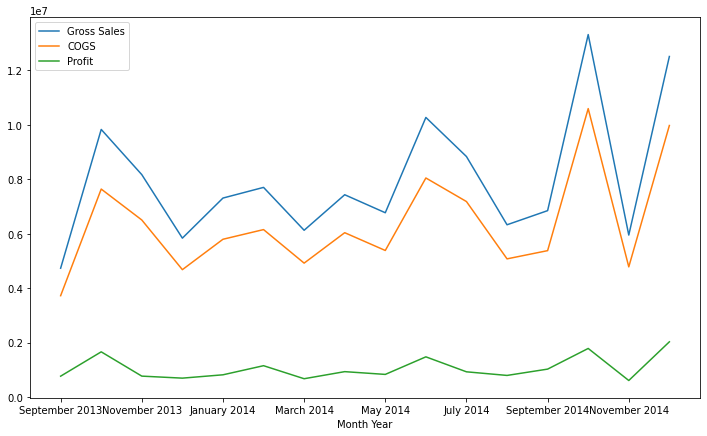

In [19]:
profit_per_month.plot(figsize=(12,7))

Oder wir können dies ganz einfach in ein Balkendiagramm ändern:

<AxesSubplot:xlabel='Month Year'>

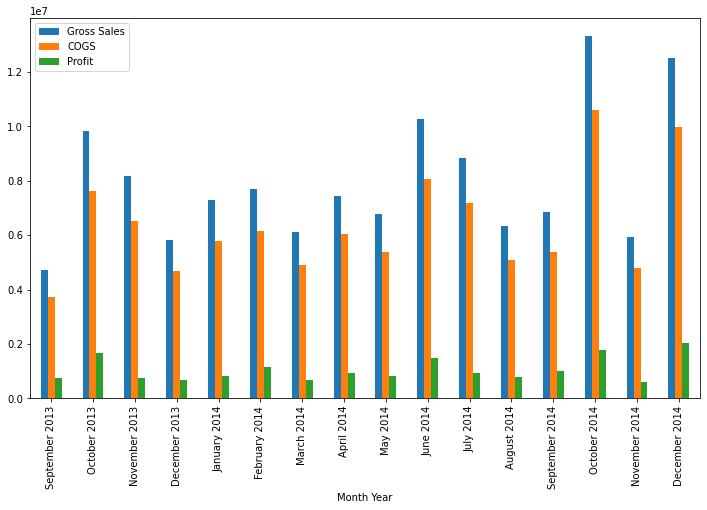

In [20]:
profit_per_month.plot(kind='bar',figsize=(12,7))

Obwohl wir die oben genannte `groupby`-Methode verwendet haben, um eine Ausgabe "Pivot Table like" zu erstellen, hat Pandas tatsächlich eine dedizierte `pivot_table`-Methode. Wenn wir z.B. den
durchschnittlichen Verkaufspreis nach Land und Produkt ermitteln wollen, können wir dies wie folgt tun:

In [21]:
df.pivot_table(values="Sale Price",index="Country",columns="Product",margins=True)

Product,Amarilla,Carretera,Montana,Paseo,VTT,Velo,All
Country,,,,,,,
Canada,169.888889,86.800000,93.666667,113.809524,143.090909,108.600000,118.428571
France,113.000000,113.611111,130.250000,92.275000,139.181818,142.863636,118.428571
Germany,126.111111,121.750000,148.055556,106.925000,108.000000,116.227273,118.428571
Mexico,133.000000,138.611111,100.950000,124.075000,128.600000,85.045455,118.428571
United States of America,103.700000,99.058824,112.647059,103.525000,171.652174,122.521739,118.428571
All,128.680851,111.774194,117.096774,108.178218,138.587156,115.238532,118.428571


Das `margin=True` Argument fügt den Zeilen und Spalten der Tabelle Zwischensummen hinzu. Die Ausgabe kann abgerundet werden, um eine bestimmte Anzahl von Dezimalstellen (in diesem Fall 2) anzuzeigen, indem `.round(2)` zum Ende hinzugefügt wird:

In [22]:
df.pivot_table(values="Sale Price",index="Country",columns="Product",margins=True).round(2)

Product,Amarilla,Carretera,Montana,Paseo,VTT,Velo,All
Country,,,,,,,
Canada,169.89,86.80,93.67,113.81,143.09,108.60,118.43
France,113.00,113.61,130.25,92.28,139.18,142.86,118.43
Germany,126.11,121.75,148.06,106.92,108.00,116.23,118.43
Mexico,133.00,138.61,100.95,124.08,128.60,85.05,118.43
United States of America,103.70,99.06,112.65,103.52,171.65,122.52,118.43
All,128.68,111.77,117.10,108.18,138.59,115.24,118.43


Das Filtern von Dataframes kann auch sehr einfach durchgeführt werden – nehmen wir an, wir möchten Ergebnisse herausfiltern, die sich auf Daten für das Land Kanada beziehen. Wir können dies auf unterschiedliche Arten tun – zum Beispiel in
einer Codezeile, die die gefilterten Daten sofort ausgibt.

In [23]:
df[df['Country'] == "Canada"]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,January 2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013,October 2013
16,Government,Canada,Paseo,None,292.0,10,20,5840.0,0.00,5840.00,2920.0,2920.00,2014-02-01,2,February,2014,February 2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Midmarket,Canada,Paseo,High,1614.0,10,15,24210.0,3631.50,20578.50,16140.0,4438.50,2014-04-01,4,April,2014,April 2014
674,Midmarket,Canada,Paseo,High,2559.0,10,15,38385.0,5757.75,32627.25,25590.0,7037.25,2014-08-01,8,August,2014,August 2014
688,Government,Canada,VTT,High,865.5,250,20,17310.0,2596.50,14713.50,8655.0,6058.50,2014-07-01,7,July,2014,July 2014
692,Enterprise,Canada,VTT,High,2954.0,250,125,369250.0,55387.50,313862.50,354480.0,-40617.50,2013-11-01,11,November,2013,November 2013


Oder wir können es in mehreren Schritten tun, indem wir zuerst den Filter einrichten und dann den Filter auf die Daten anwenden.

In [24]:
#set up filter
df_canada = df['Country'] == "Canada"
#Apply filter to data
df[df_canada]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,January 2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013,October 2013
16,Government,Canada,Paseo,None,292.0,10,20,5840.0,0.00,5840.00,2920.0,2920.00,2014-02-01,2,February,2014,February 2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Midmarket,Canada,Paseo,High,1614.0,10,15,24210.0,3631.50,20578.50,16140.0,4438.50,2014-04-01,4,April,2014,April 2014
674,Midmarket,Canada,Paseo,High,2559.0,10,15,38385.0,5757.75,32627.25,25590.0,7037.25,2014-08-01,8,August,2014,August 2014
688,Government,Canada,VTT,High,865.5,250,20,17310.0,2596.50,14713.50,8655.0,6058.50,2014-07-01,7,July,2014,July 2014
692,Enterprise,Canada,VTT,High,2954.0,250,125,369250.0,55387.50,313862.50,354480.0,-40617.50,2013-11-01,11,November,2013,November 2013


Dies ermöglicht es uns, mehrere Filter einzurichten und sie dann alle auf einmal auf die Daten anzuwenden – unten fügen wir den Filter hinzu, dass das Produkt "Montana" sein muss, und dann wenden wir beide Filter auf die Daten an.

In [25]:
#set up filters
df_canada = df['Country'] == "Canada"
df_montana = df['Product'] == "Montana"
#Apply filters to data
df[df_canada & df_montana]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013,October 2013
71,Government,Canada,Montana,Low,1830.0,5,7,12810.0,128.10,12681.90,9150.0,3531.90,2014-08-01,8,August,2014,August 2014
183,Midmarket,Canada,Montana,Low,1967.0,5,15,29505.0,1180.20,28324.80,19670.0,8654.80,2014-03-01,3,March,2014,March 2014
185,Government,Canada,Montana,Low,2851.0,5,7,19957.0,798.28,19158.72,14255.0,4903.72,2013-10-01,10,October,2013,October 2013
357,Government,Canada,Montana,Medium,488.0,5,7,3416.0,273.28,3142.72,2440.0,702.72,2014-02-01,2,February,2014,February 2014
365,Government,Canada,Montana,Medium,708.0,5,20,14160.0,1132.80,13027.20,7080.0,5947.20,2014-06-01,6,June,2014,June 2014
368,Small Business,Canada,Montana,Medium,1283.0,5,300,384900.0,30792.00,354108.00,320750.0,33358.00,2013-09-01,9,September,2013,September 2013
405,Small Business,Canada,Montana,Medium,3802.5,5,300,1140750.0,102667.50,1038082.50,950625.0,87457.50,2014-04-01,4,April,2014,April 2014


Technisch könnte dies auch in einer Codezeile geschehen, aber es ist oft etwas ordentlicher und aus didaktischen Gründen einfacher, wenn wir es Schritt für Schritt tun.
Wenn Sie dies in einer Codezeile tun möchten:

In [26]:
df[(df['Country'] == "Canada") & (df['Product'] == "Montana")]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013,October 2013
71,Government,Canada,Montana,Low,1830.0,5,7,12810.0,128.10,12681.90,9150.0,3531.90,2014-08-01,8,August,2014,August 2014
183,Midmarket,Canada,Montana,Low,1967.0,5,15,29505.0,1180.20,28324.80,19670.0,8654.80,2014-03-01,3,March,2014,March 2014
185,Government,Canada,Montana,Low,2851.0,5,7,19957.0,798.28,19158.72,14255.0,4903.72,2013-10-01,10,October,2013,October 2013
357,Government,Canada,Montana,Medium,488.0,5,7,3416.0,273.28,3142.72,2440.0,702.72,2014-02-01,2,February,2014,February 2014
365,Government,Canada,Montana,Medium,708.0,5,20,14160.0,1132.80,13027.20,7080.0,5947.20,2014-06-01,6,June,2014,June 2014
368,Small Business,Canada,Montana,Medium,1283.0,5,300,384900.0,30792.00,354108.00,320750.0,33358.00,2013-09-01,9,September,2013,September 2013
405,Small Business,Canada,Montana,Medium,3802.5,5,300,1140750.0,102667.50,1038082.50,950625.0,87457.50,2014-04-01,4,April,2014,April 2014


Um nach mehreren Werten innerhalb einer Spalte zu filtern, können Sie die `isin`-Methode verwenden – angenommen uns interessieren Daten, bei denen das Land entweder Kanada oder Frankreich ist:

In [27]:
df[df["Country"].isin(["Canada","France"])]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014,January 2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014,June 2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Government,Canada,VTT,High,865.5,250,20,17310.0,2596.50,14713.50,8655.0,6058.50,2014-07-01,7,July,2014,July 2014
692,Enterprise,Canada,VTT,High,2954.0,250,125,369250.0,55387.50,313862.50,354480.0,-40617.50,2013-11-01,11,November,2013,November 2013
694,Government,France,VTT,High,293.0,250,20,5860.0,879.00,4981.00,2930.0,2051.00,2014-12-01,12,December,2014,December 2014
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014,March 2014


Und nur zur Vollständigkeit können wir die gleiche Logik verwenden, um mehrere Filter auf mehrere Spalten gleichzeitig anzuwenden – sagen wir, wir möchten nach Ländern filtern, entweder Kanada oder Frankreich,
und nach den Produkten Montana und Paseo:

In [28]:
df[(df["Country"].isin(["Canada","France"])) & (df["Product"].isin(["Montana","Paseo"]))]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014,June 2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013,October 2013
16,Government,Canada,Paseo,None,292.0,10,20,5840.0,0.00,5840.00,2920.0,2920.00,2014-02-01,2,February,2014,February 2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Government,France,Paseo,High,1922.0,10,350,672700.0,94178.00,578522.00,499720.0,78802.00,2013-11-01,11,November,2013,November 2013
671,Midmarket,Canada,Paseo,High,1614.0,10,15,24210.0,3631.50,20578.50,16140.0,4438.50,2014-04-01,4,April,2014,April 2014
674,Midmarket,Canada,Paseo,High,2559.0,10,15,38385.0,5757.75,32627.25,25590.0,7037.25,2014-08-01,8,August,2014,August 2014
681,Government,France,Paseo,High,293.0,10,20,5860.0,879.00,4981.00,2930.0,2051.00,2014-12-01,12,December,2014,December 2014


Eine andere Sache, die wir mit Pandas tun können, ist die Anwendung bedingter Formatierungen – zum Beispiel möchten wir ausgewählte Daten in den gefilterten Daten hervorheben, die wir gerade oben erstellt haben. Angenommen wir möchten in der Spalte "Units Sold" alle Werte unter 1000 in Rot markieren. Dafür müssen wir zuerst eine einfache Funktion erstellen und diese dann auf das Dataframe anwenden.

In [29]:
def colour_red(val):
    color = 'red' if val < 1000 else 'black'
    return 'color: %s' % color
#filter DataFrame
df_canada = df['Country'] == "Canada"
df_montana = df['Product'] == "Montana"
df_filtered = df[df_canada & df_montana]
#apply style to "Units Sold" column
df_filtered.style.applymap(colour_red, subset=pd.IndexSlice[:, ['Units Sold']]) #alle Zeilen, nur Spalte 'Units Sold'

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
7,Channel Partners,Canada,Montana,None,2518.000000,5,12,30216.000000,0.000000,30216.000000,7554.000000,22662.000000,2014-06-01 00:00:00,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.500000,5,125,333187.500000,0.000000,333187.500000,319860.000000,13327.500000,2014-07-01 00:00:00,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.000000,5,125,43125.000000,0.000000,43125.000000,41400.000000,1725.000000,2013-10-01 00:00:00,10,October,2013,October 2013
71,Government,Canada,Montana,Low,1830.000000,5,7,12810.000000,128.100000,12681.900000,9150.000000,3531.900000,2014-08-01 00:00:00,8,August,2014,August 2014
183,Midmarket,Canada,Montana,Low,1967.000000,5,15,29505.000000,1180.200000,28324.800000,19670.000000,8654.800000,2014-03-01 00:00:00,3,March,2014,March 2014
185,Government,Canada,Montana,Low,2851.000000,5,7,19957.000000,798.280000,19158.720000,14255.000000,4903.720000,2013-10-01 00:00:00,10,October,2013,October 2013
357,Government,Canada,Montana,Medium,488.000000,5,7,3416.000000,273.280000,3142.720000,2440.000000,702.720000,2014-02-01 00:00:00,2,February,2014,February 2014
365,Government,Canada,Montana,Medium,708.000000,5,20,14160.000000,1132.800000,13027.200000,7080.000000,5947.200000,2014-06-01 00:00:00,6,June,2014,June 2014
368,Small Business,Canada,Montana,Medium,1283.000000,5,300,384900.000000,30792.000000,354108.000000,320750.000000,33358.000000,2013-09-01 00:00:00,9,September,2013,September 2013
405,Small Business,Canada,Montana,Medium,3802.500000,5,300,1140750.000000,102667.500000,1038082.500000,950625.000000,87457.500000,2014-04-01 00:00:00,4,April,2014,April 2014


Wir können auch komplexe Formatierungsstile verwenden – hier ist nur ein Beispiel:

In [30]:
df_filtered.style.bar(color='#d65f5f')

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Month Year
7,Channel Partners,Canada,Montana,None,2518.000000,5,12,30216.000000,0.000000,30216.000000,7554.000000,22662.000000,2014-06-01 00:00:00,6,June,2014,June 2014
11,Enterprise,Canada,Montana,None,2665.500000,5,125,333187.500000,0.000000,333187.500000,319860.000000,13327.500000,2014-07-01 00:00:00,7,July,2014,July 2014
14,Enterprise,Canada,Montana,None,345.000000,5,125,43125.000000,0.000000,43125.000000,41400.000000,1725.000000,2013-10-01 00:00:00,10,October,2013,October 2013
71,Government,Canada,Montana,Low,1830.000000,5,7,12810.000000,128.100000,12681.900000,9150.000000,3531.900000,2014-08-01 00:00:00,8,August,2014,August 2014
183,Midmarket,Canada,Montana,Low,1967.000000,5,15,29505.000000,1180.200000,28324.800000,19670.000000,8654.800000,2014-03-01 00:00:00,3,March,2014,March 2014
185,Government,Canada,Montana,Low,2851.000000,5,7,19957.000000,798.280000,19158.720000,14255.000000,4903.720000,2013-10-01 00:00:00,10,October,2013,October 2013
357,Government,Canada,Montana,Medium,488.000000,5,7,3416.000000,273.280000,3142.720000,2440.000000,702.720000,2014-02-01 00:00:00,2,February,2014,February 2014
365,Government,Canada,Montana,Medium,708.000000,5,20,14160.000000,1132.800000,13027.200000,7080.000000,5947.200000,2014-06-01 00:00:00,6,June,2014,June 2014
368,Small Business,Canada,Montana,Medium,1283.000000,5,300,384900.000000,30792.000000,354108.000000,320750.000000,33358.000000,2013-09-01 00:00:00,9,September,2013,September 2013
405,Small Business,Canada,Montana,Medium,3802.500000,5,300,1140750.000000,102667.500000,1038082.500000,950625.000000,87457.500000,2014-04-01 00:00:00,4,April,2014,April 2014


So, vielleicht werden Sie mir jetzt zustimmen, dass Pandas zwar eine steilere Lernkurve hat als Excel, aber sobald ein gewisses Maß an Routine erreicht ist, sind die Möglichkeiten wirklich fantastisch.
Es gibt viel mehr Funktionalität von Pandas, dass ich nicht erwähnt habe. In der Tat habe ich lediglich an der Oberfläche gekratzt, daher fühlen Sie sich aufgefordert, das Modul weiter zu untersuchen! Schauen Sie in das Lehrbuch (**Datenanalyse mit Python** von Wes McKinney) oder in die Online Dokumentation (https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).